In [4]:
import numpy as np
import pandas as pd
import os
import sys

# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingRules import mean_aggregation, median_aggregation, quadratic_aggregation
from model.VotingModel import VotingModel

def l1_distance(x, xi):
    """Calculate the L1 distance between two vectors."""
    return np.sum(np.abs(x - xi))

def evaluate_social_welfare(model):
    social_welfare_results = []
    for method in ["mean", "median", "quadratic"]:
        outcome = model.allocate_funds(method)
        total_distance = 0
        for i in range(model.num_voters):
            total_distance += l1_distance(outcome, model.voting_matrix[i])
        average_distance = total_distance / model.num_voters
        social_welfare_results.append({
            "voting_rule": method,
            "average_l1_distance": average_distance
        })

    return pd.DataFrame(social_welfare_results)

# Initialize the model
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
voter_type='random_uniform_model'
model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
model.step()

# Evaluate social welfare maximization
social_welfare_results = evaluate_social_welfare(model)
social_welfare_results

,voting_rule,average_l1_distance
0,mean,2.206687e+07
1,median,2.207634e+07
2,quadratic,2.207968e+07


In [7]:
import numpy as np
import pandas as pd
import os
import sys

# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingRules import mean_aggregation, median_aggregation, quadratic_aggregation
from model.VotingModel import VotingModel

def calculate_social_welfare(allocation, voting_matrix):
    n = voting_matrix.shape[0]
    total_distance = np.sum(np.linalg.norm(voting_matrix - allocation, ord=1, axis=1))
    return total_distance / n

def simulate_social_welfare(model, num_rounds, voting_rules):
    results = {'round': list(range(1, num_rounds + 1))}
    for voting_rule in voting_rules:
        results[f'{voting_rule}_social_welfare'] = []

    for round_num in range(num_rounds):
        model.step()
        for voting_rule in voting_rules:
            allocation = model.allocate_funds(voting_rule)
            social_welfare = calculate_social_welfare(allocation, model.voting_matrix)
            results[f'{voting_rule}_social_welfare'].append(social_welfare)
    
    return pd.DataFrame(results)

# Initialize the model
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
num_rounds = 100
voter_type = 'random_uniform_model'
voting_rules = ["mean", "median", "quadratic"]  # Voting rules to evaluate

model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
model.step()

# Simulate the social welfare metric
social_welfare_results = simulate_social_welfare(model, num_rounds, voting_rules)
social_welfare_results

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


,round,mean_social_welfare,median_social_welfare,quadratic_social_welfare
0,1,2.203332e+07,2.203637e+07,2.204416e+07
1,2,2.197265e+07,2.198519e+07,2.198608e+07
2,3,2.197318e+07,2.198487e+07,2.199106e+07
3,4,2.199936e+07,2.201238e+07,2.201486e+07
4,5,2.204189e+07,2.205867e+07,2.205714e+07
...,...,...,...,...
95,96,2.194786e+07,2.197043e+07,2.196359e+07
96,97,2.189432e+07,2.189946e+07,2.190981e+07
97,98,2.197078e+07,2.196923e+07,2.198740e+07
98,99,2.198662e+07,2.199513e+07,2.199914e+07


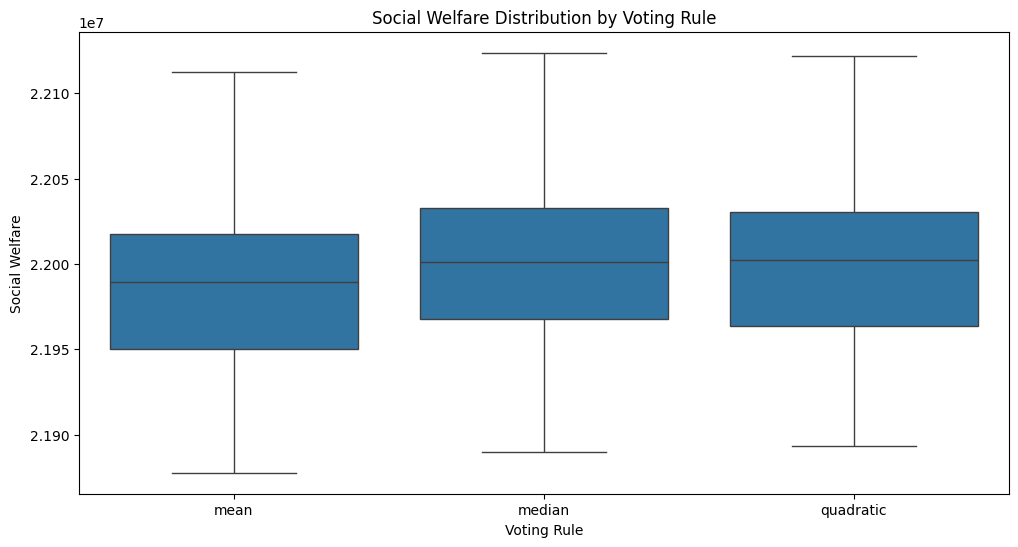

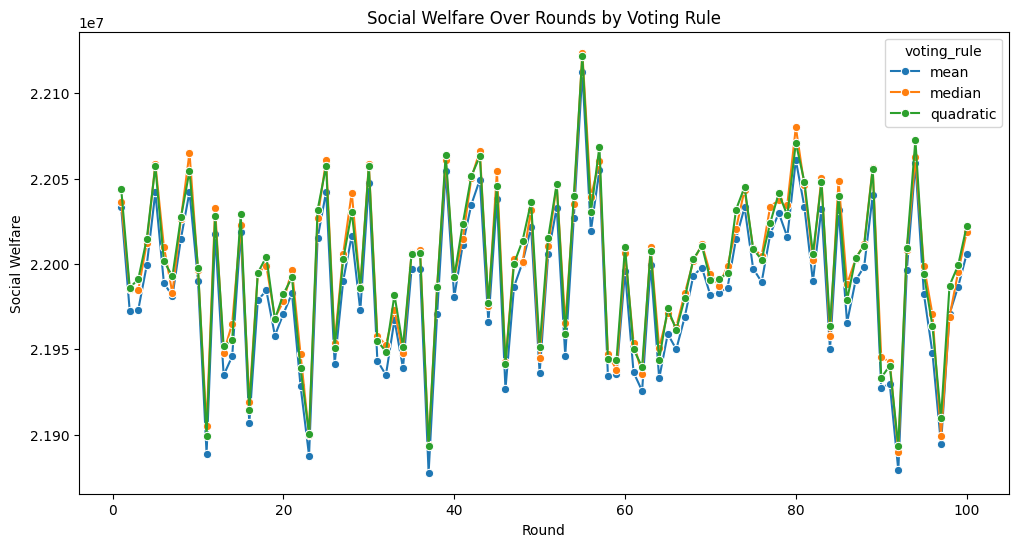

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()
